# Simplex Projection of Climate/Vegetation

Sugihara & May 1990: https://www.nature.com/articles/344734a0

https://sugiharalab.github.io/EDM_Documentation/edm_functions/#simplex

In [41]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
import scipy.stats

In [2]:
EA_TS_DIR = '/home/rgreen/DroughtEDM/Data/EA_TS_16/Final/'
EA_TS_DIR_ANOM = '/home/rgreen/DroughtEDM/Data/EA_TS_16/Final_Anomaly/'
EASTAFRICA_FINAL = '/home/rgreen/DroughtEDM/Data/EA_TS_16/EastAfrica_Final/scaled/'

In [51]:
def simplex_error(in_dir, file, var1, var2, train, test):
    '''
    This function computes the simplex prediction skill for a combination of embedding dimensions and prediction intervals for a given land cover and environmental variable
    The result is a nested list of error values that will be input into the following function to create a dataframe
    Args:
    - in_dir: input directory 
    - file: filename (string)
    - var1: training variable (string)
    - var2: testing variable (string) (often training and testing the same)
    - train: portion of data library used to train (string of range with space between values)
    - test: portion of data libary used to test (string of range with space between values) 
    
    '''
    
    
    #param_range = list(itertools.product(list(range(1,11)), repeat = 2)) #combination of pairs with repeat values
    param_range = list(itertools.product(list(range(1,19)), repeat = 2))[:180] #cut off at 180 because we are only interested in the first 10 embedding dimensions but 18 dekads forward 
    output = []
   
    for i in param_range:  
        simplex_result = Simplex(pathIn = in_dir, dataFile = file, lib = train, pred = test, E = i[0], Tp = i[1], columns = var1, target = var2, showPlot = False)
        error = ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))
        MAE = list(error.values())[0]
        RMSE = list(error.values())[1]
        rho = list(error.values())[2]
        output.append(rho) #change depending on error parameter of interest
        
    return [output]
             
def simplex_error_df(error_lists):
    
    '''
    This function takes the errors values and creates a dataframe of prediction skill combinations
    Args:
    - error_list: nested list of error values from simplex combinations 
    
    '''
    
    for i in error_lists:
        chunks = np.array_split(np.array(i), 10)
        df = pd.DataFrame(np.vstack(chunks))
        
    return df
    
    

In [61]:

spx_ndvi_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_shrubland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_broadleaf_open_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_broadleaf_open.csv', 'NDVI', 'NDVI', '1 100', '101 606')

spx_precip_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'P', 'P', '1 100', '101 606')
spx_precip_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'P', 'P', '1 100', '101 606')
spx_precip_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')
spx_precip_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_shrubland.csv', 'P', 'P', '1 100', '101 606')
spx_precip_broadleaf_open_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_broadleaf_open.csv', 'P', 'P', '1 100', '101 606')


spx_lst_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_shrubland.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_broadleaf_open_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_broadleaf_open.csv', 'LST', 'LST', '1 100', '101 606')

In [52]:
spx_ndvi_crop_irr_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_crop_irr.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_crop_rain_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_crop_rain.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_grassland_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_shrubland_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_shrubland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_broadleaf_open_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_broadleaf_open.csv', 'NDVI', 'NDVI', '1 100', '101 606')

spx_precip_crop_irr_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_crop_irr.csv', 'P', 'P', '1 100', '101 606')
spx_precip_crop_rain_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_crop_rain.csv', 'P', 'P', '1 100', '101 606')
spx_precip_grassland_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_grassland.csv', 'P', 'P', '1 100', '101 606')
spx_precip_shrubland_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_shrubland.csv', 'P', 'P', '1 100', '101 606')
spx_precip_broadleaf_open_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_broadleaf_open.csv', 'P', 'P', '1 100', '101 606')


spx_lst_crop_irr_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_crop_irr.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_crop_rain_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_crop_rain.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_grassland_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_grassland.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_shrubland_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_shrubland.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_broadleaf_open_rho = simplex_error(EASTAFRICA_FINAL, 'EastAfrica_scaled_ea_full_broadleaf_open.csv', 'LST', 'LST', '1 100', '101 606')

In [42]:
# spx_ndvi_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'NDVI', 'NDVI', '1 100', '101 606')
# spx_ndvi_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'NDVI', 'NDVI', '1 100', '101 606')
# spx_ndvi_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
# spx_ndvi_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')

# spx_precip_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'P', 'P', '1 100', '101 606')
# spx_precip_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'P', 'P', '1 100', '101 606')
# spx_precip_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')
# spx_precip_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')

# spx_lst_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'LST', 'LST', '1 100', '101 606')
# spx_lst_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'LST', 'LST', '1 100', '101 606')
# spx_lst_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')
# spx_lst_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')

In [54]:
spx_ndvi_crop_irr_rho_df = simplex_error_df(spx_ndvi_crop_irr_rho)
spx_ndvi_crop_rain_rho_df = simplex_error_df(spx_ndvi_crop_rain_rho)
spx_ndvi_grassland_rho_df = simplex_error_df(spx_ndvi_grassland_rho)
spx_ndvi_shrubland_rho_df = simplex_error_df(spx_ndvi_shrubland_rho)
spx_ndvi_broadleaf_open_rho_df = simplex_error_df(spx_ndvi_broadleaf_open_rho)

spx_precip_crop_irr_rho_df = simplex_error_df(spx_precip_crop_irr_rho)
spx_precip_crop_rain_rho_df = simplex_error_df(spx_precip_crop_rain_rho)
spx_precip_grassland_rho_df = simplex_error_df(spx_precip_grassland_rho)
spx_precip_shrubland_rho_df = simplex_error_df(spx_precip_shrubland_rho)
spx_precip_broadleaf_open_rho_df = simplex_error_df(spx_precip_broadleaf_open_rho)

spx_lst_crop_irr_rho_df = simplex_error_df(spx_lst_crop_irr_rho)
spx_lst_crop_rain_rho_df = simplex_error_df(spx_lst_crop_rain_rho)
spx_lst_grassland_rho_df = simplex_error_df(spx_lst_grassland_rho)
spx_lst_shrubland_rho_df = simplex_error_df(spx_lst_shrubland_rho)
spx_lst_broadleaf_open_rho_df = simplex_error_df(spx_lst_broadleaf_open_rho)

In [124]:
spx_ndvi_crop_irr_rho_df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

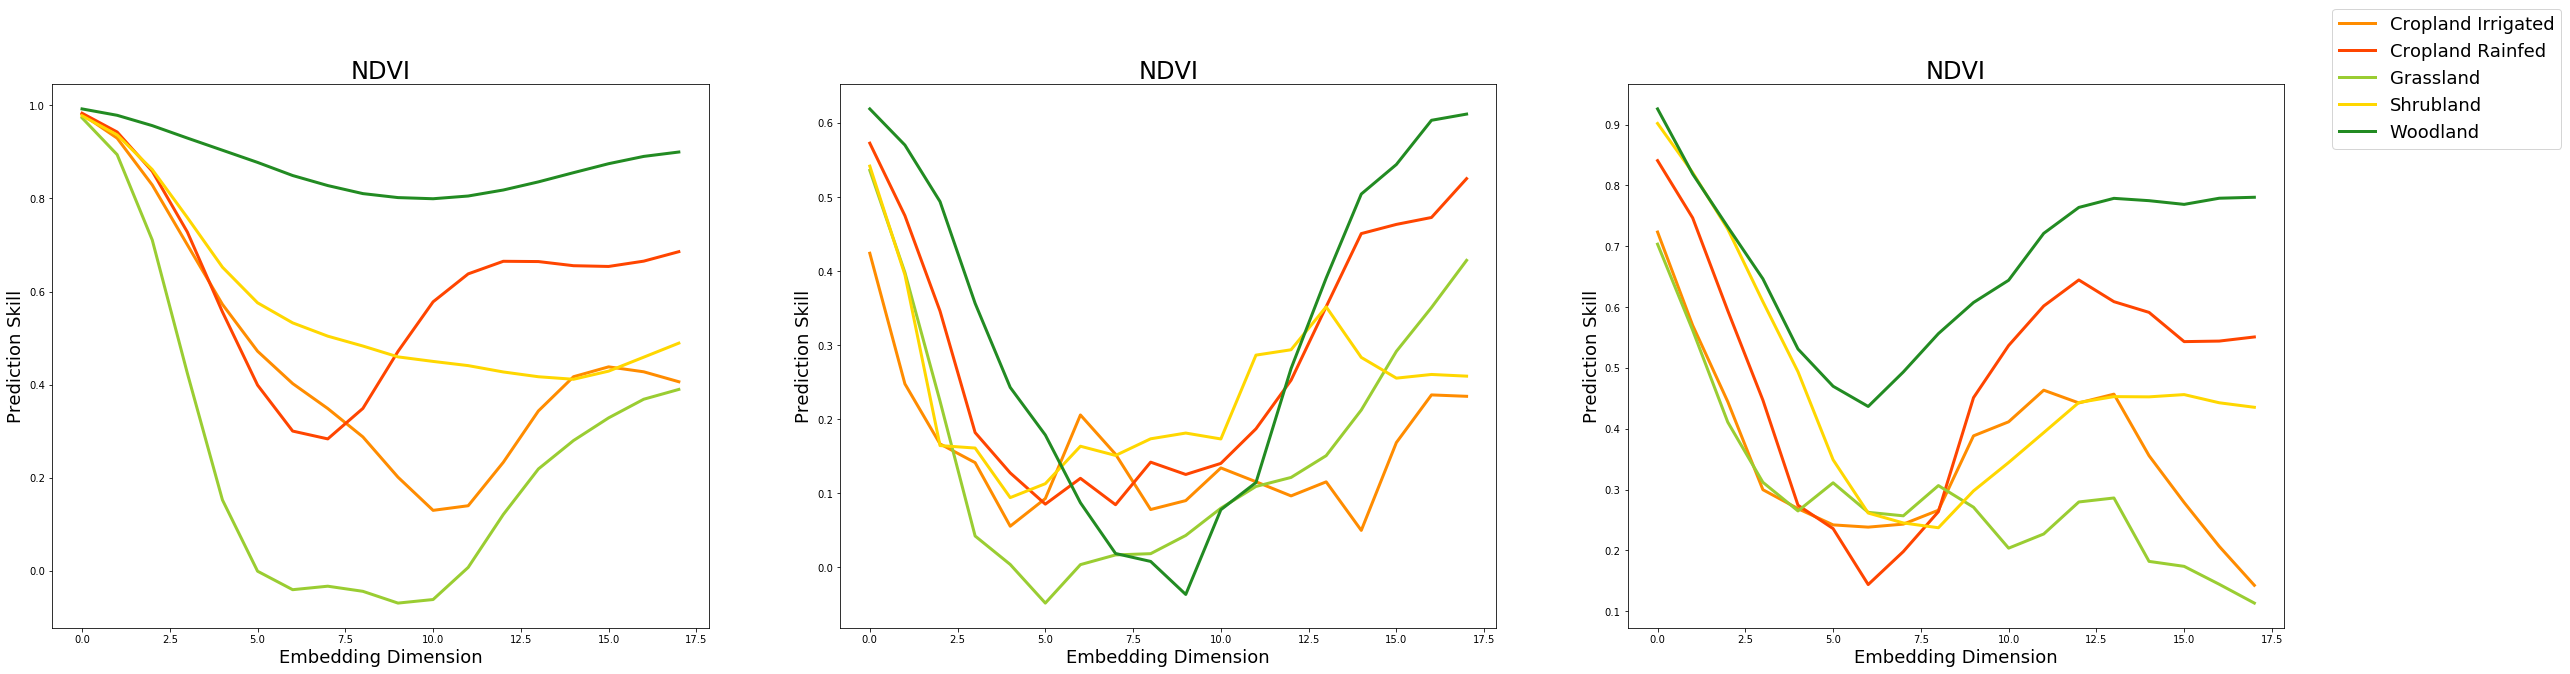

In [127]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = (40, 10))
ax1.plot(spx_ndvi_crop_irr_rho_df.columns.values, spx_ndvi_crop_irr_rho_df.loc[1,:], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
ax1.plot(spx_ndvi_crop_rain_rho_df.columns.values, spx_ndvi_crop_rain_rho_df.loc[1,:], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
ax1.plot(spx_ndvi_grassland_rho_df.columns.values, spx_ndvi_grassland_rho_df.loc[1,:], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
ax1.plot(spx_ndvi_shrubland_rho_df.columns.values, spx_ndvi_shrubland_rho_df.loc[1,:], c = 'gold', label = 'Shrubland', linewidth = 3)
ax1.plot(spx_ndvi_broadleaf_open_rho_df.columns.values, spx_ndvi_broadleaf_open_rho_df.loc[1,:], c = 'forestgreen', label = 'Woodland', linewidth = 3)
ax1.set_xlabel('Embedding Dimension', fontsize = 18)
ax1.set_ylabel('Prediction Skill', fontsize = 18)
ax1.set_title('NDVI', fontsize = 24)

ax2.plot(spx_precip_crop_irr_rho_df.columns.values, spx_precip_crop_irr_rho_df.loc[1,:], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
ax2.plot(spx_precip_crop_rain_rho_df.columns.values, spx_precip_crop_rain_rho_df.loc[1,:], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
ax2.plot(spx_precip_grassland_rho_df.columns.values, spx_precip_grassland_rho_df.loc[1,:], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
ax2.plot(spx_precip_shrubland_rho_df.columns.values, spx_precip_shrubland_rho_df.loc[1,:], c = 'gold', label = 'Shrubland', linewidth = 3)
ax2.plot(spx_precip_broadleaf_open_rho_df.columns.values, spx_precip_broadleaf_open_rho_df.loc[1,:], c = 'forestgreen', label = 'Woodland', linewidth = 3)
ax2.set_xlabel('Embedding Dimension', fontsize = 18)
ax2.set_ylabel('Prediction Skill', fontsize = 18)
ax2.set_title('NDVI', fontsize = 24)

ax3.plot(spx_lst_crop_irr_rho_df.columns.values, spx_lst_crop_irr_rho_df.loc[1,:], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
ax3.plot(spx_lst_crop_rain_rho_df.columns.values, spx_lst_crop_rain_rho_df.loc[1,:], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
ax3.plot(spx_lst_grassland_rho_df.columns.values, spx_lst_grassland_rho_df.loc[1,:], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
ax3.plot(spx_lst_shrubland_rho_df.columns.values, spx_lst_shrubland_rho_df.loc[1,:], c = 'gold', label = 'Shrubland', linewidth = 3)
ax3.plot(spx_ndvi_broadleaf_open_rho_df.columns.values, spx_lst_broadleaf_open_rho_df.loc[1,:], c = 'forestgreen', label = 'Woodland', linewidth = 3)
ax3.set_xlabel('Embedding Dimension', fontsize = 18)
ax3.set_ylabel('Prediction Skill', fontsize = 18)
ax3.set_title('NDVI', fontsize = 24)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 18)

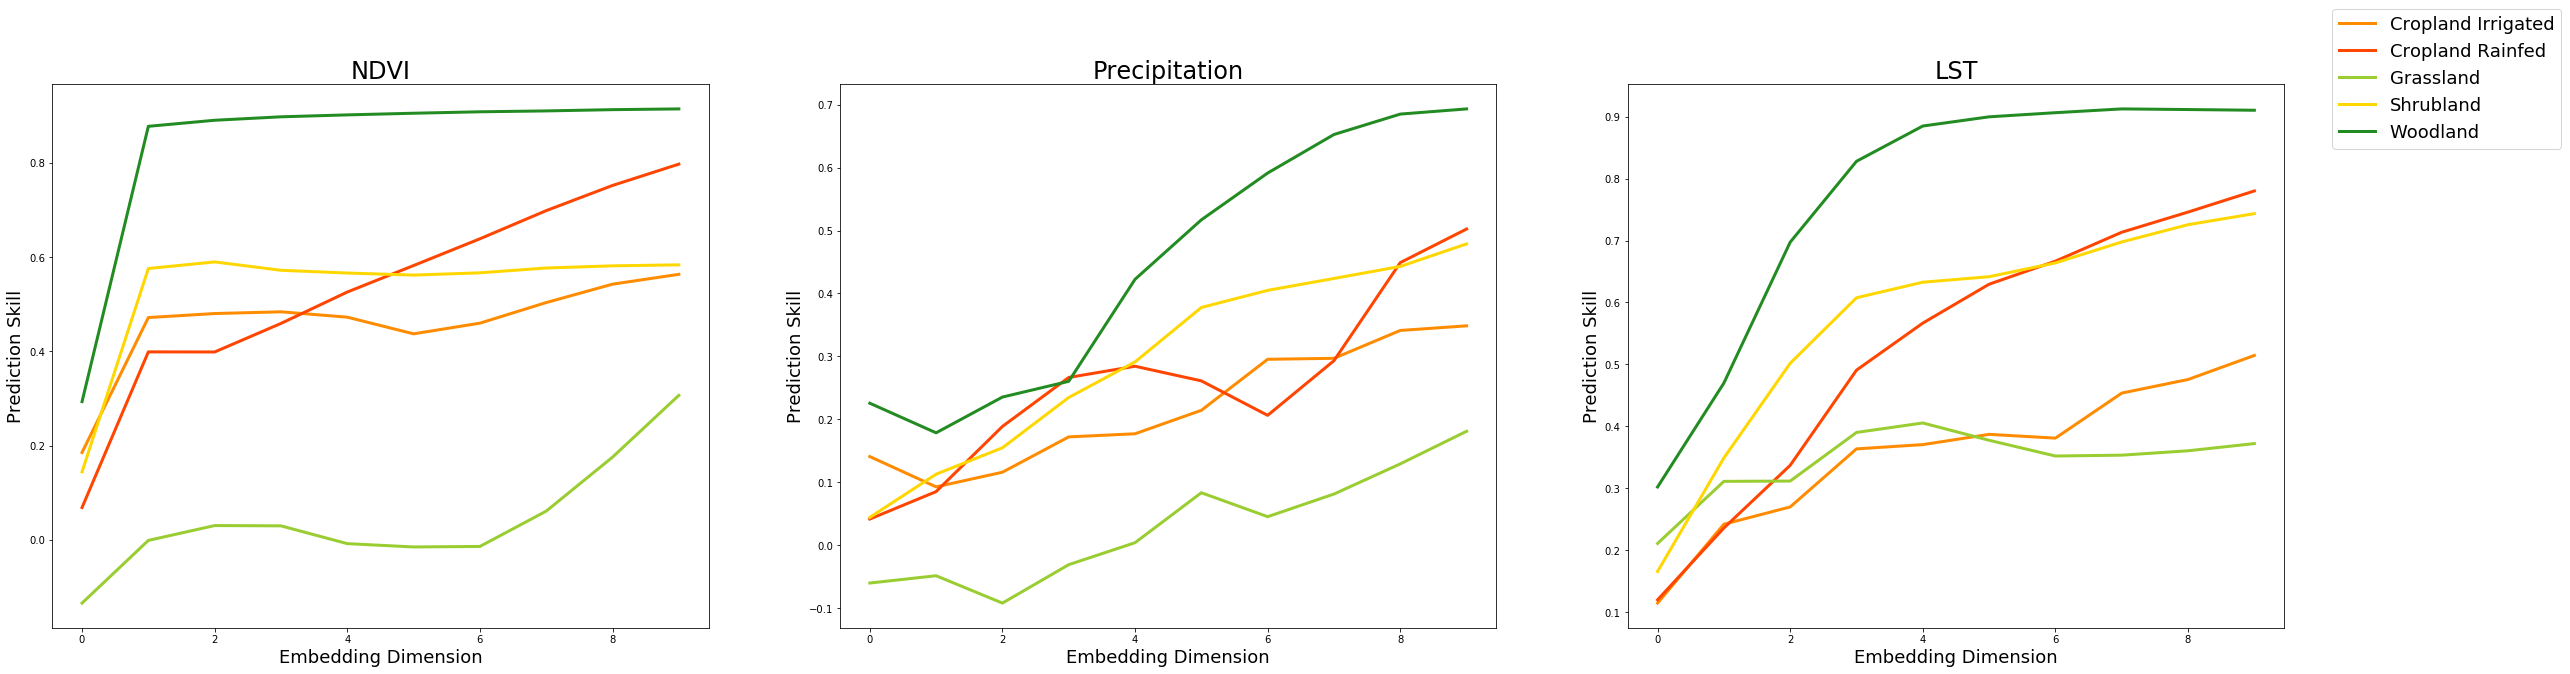

In [120]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = (40, 10))
ax1.plot(spx_ndvi_crop_irr_rho_df.index, spx_ndvi_crop_irr_rho_df.loc[:,5], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
ax1.plot(spx_ndvi_crop_rain_rho_df.index, spx_ndvi_crop_rain_rho_df.loc[:,5], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
ax1.plot(spx_ndvi_grassland_rho_df.index, spx_ndvi_grassland_rho_df.loc[:,5], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
ax1.plot(spx_ndvi_shrubland_rho_df.index, spx_ndvi_shrubland_rho_df.loc[:,5], c = 'gold', label = 'Shrubland', linewidth = 3)
ax1.plot(spx_ndvi_broadleaf_open_rho_df.index, spx_ndvi_broadleaf_open_rho_df.loc[:,5], c = 'forestgreen', label = 'Woodland', linewidth = 3)
ax1.set_xlabel('Embedding Dimension', fontsize = 18)
ax1.set_ylabel('Prediction Skill', fontsize = 18)
ax1.set_title('NDVI', fontsize = 24)

ax2.plot(spx_precip_crop_irr_rho_df.index, spx_precip_crop_irr_rho_df.loc[:,5], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
ax2.plot(spx_precip_crop_rain_rho_df.index, spx_precip_crop_rain_rho_df.loc[:,5], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
ax2.plot(spx_precip_grassland_rho_df.index, spx_precip_grassland_rho_df.loc[:,5], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
ax2.plot(spx_precip_shrubland_rho_df.index, spx_precip_shrubland_rho_df.loc[:,5], c = 'gold', label = 'Shrubland', linewidth = 3)
ax2.plot(spx_precip_broadleaf_open_rho_df.index, spx_precip_broadleaf_open_rho_df.loc[:,5], c = 'forestgreen', label = 'Woodland', linewidth = 3)
ax2.set_xlabel('Embedding Dimension', fontsize = 18)
ax2.set_ylabel('Prediction Skill', fontsize = 18)
ax2.set_title('Precipitation', fontsize = 24)

ax3.plot(spx_lst_crop_irr_rho_df.index, spx_lst_crop_irr_rho_df.loc[:,5], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
ax3.plot(spx_lst_crop_rain_rho_df.index, spx_lst_crop_rain_rho_df.loc[:,5], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
ax3.plot(spx_lst_grassland_rho_df.index, spx_lst_grassland_rho_df.loc[:,5], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
ax3.plot(spx_lst_shrubland_rho_df.index, spx_lst_shrubland_rho_df.loc[:,5], c = 'gold', label = 'Shrubland', linewidth = 3)
ax3.plot(spx_lst_broadleaf_open_rho_df.index, spx_lst_broadleaf_open_rho_df.loc[:,5], c = 'forestgreen', label = 'Woodland', linewidth = 3)
ax3.set_xlabel('Embedding Dimension', fontsize = 18)
ax3.set_ylabel('Prediction Skill', fontsize = 18)
ax3.set_title('LST', fontsize = 24)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 18)

Text(0, 0.5, 'Prediction Skill')

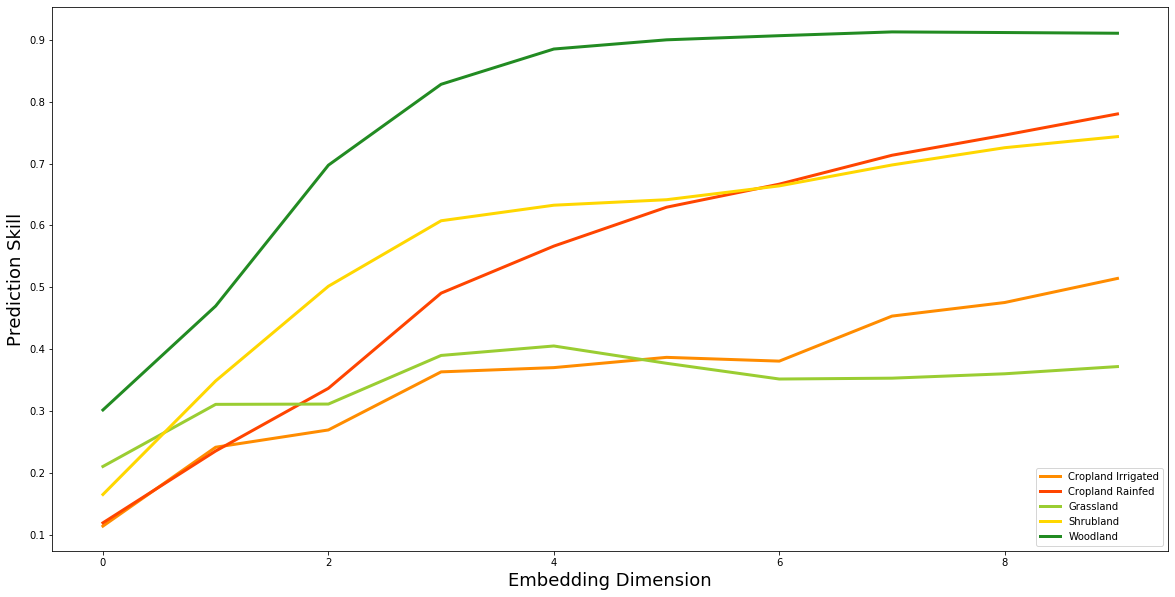

In [84]:
fig = plt.figure(figsize = (20, 10))
plt.plot(spx_lst_crop_irr_rho_df.index, spx_lst_crop_irr_rho_df.loc[:,5], c = 'darkorange', label = 'Cropland Irrigated', linewidth = 3)
plt.plot(spx_lst_crop_rain_rho_df.index, spx_lst_crop_rain_rho_df.loc[:,5], c = 'orangered', label = 'Cropland Rainfed', linewidth = 3)
plt.plot(spx_lst_grassland_rho_df.index, spx_lst_grassland_rho_df.loc[:,5], c = 'yellowgreen', label = 'Grassland', linewidth = 3)
plt.plot(spx_lst_shrubland_rho_df.index, spx_lst_shrubland_rho_df.loc[:,5], c = 'gold', label = 'Shrubland', linewidth = 3)
plt.plot(spx_lst_broadleaf_open_rho_df.index, spx_lst_broadleaf_open_rho_df.loc[:,5], c = 'forestgreen', label = 'Woodland', linewidth = 3)
plt.legend(loc = 4)
plt.xlabel('Embedding Dimension', fontsize = 18)
plt.ylabel('Prediction Skill', fontsize = 18)

# Plot Simplex Projection Error Across Variables and Land Cover Types

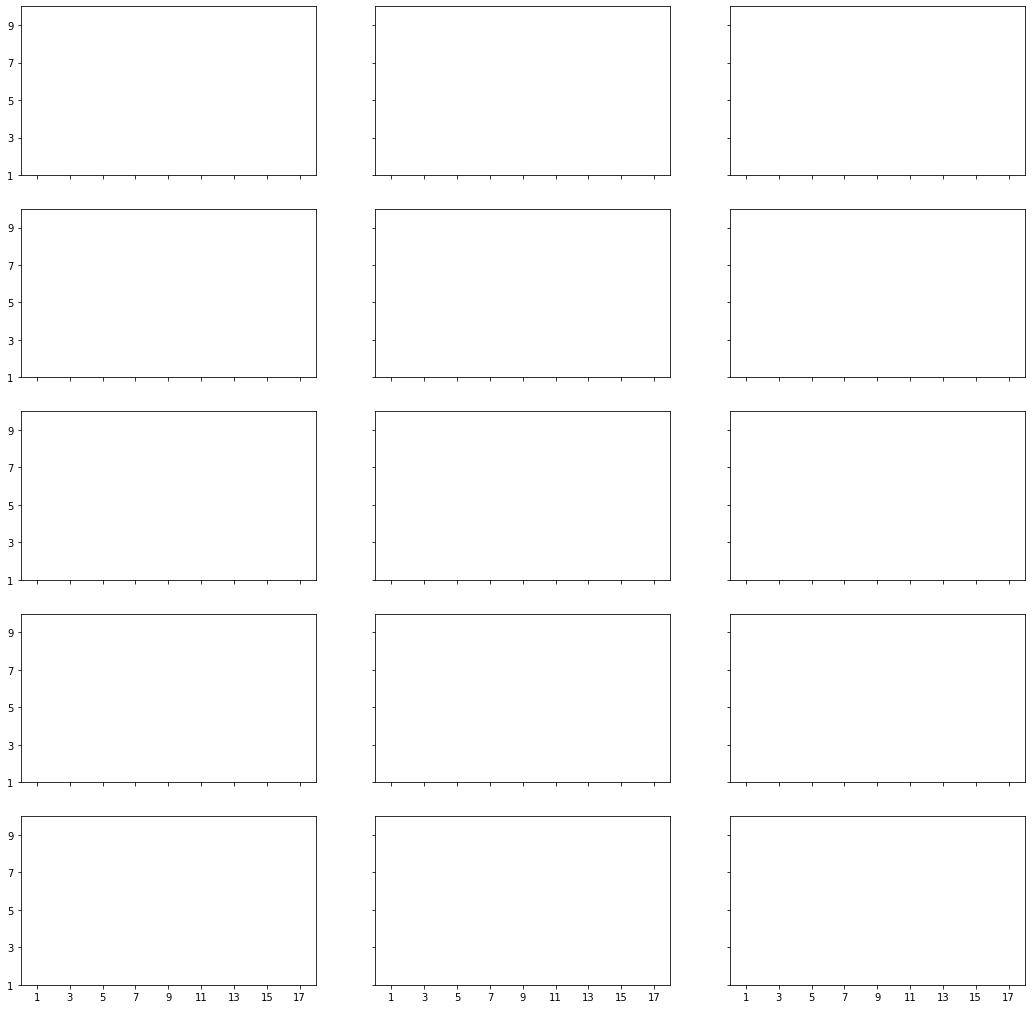

In [66]:
fig, axs = plt.subplots(5, 3, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'LST']
lc_list = ['Rainfed Croplands', 'Irrigated Croplands', 'Grasslands', 'Shrublands', 'Broadleaf Open Tree Cover']


df_list = [spx_ndvi_crop_irr_rho_df, spx_precip_crop_irr_rho_df, spx_lst_crop_irr_rho_df, 
           spx_ndvi_crop_rain_rho_df, spx_precip_crop_rain_rho_df, spx_lst_crop_rain_rho_df,
           spx_ndvi_grassland_rho_df, spx_precip_grassland_rho_df, spx_lst_grassland_rho_df,
           spx_ndvi_shrubland_rho_df, spx_precip_shrubland_rho_df, spx_lst_shrubland_rho_df,
           spx_ndvi_broadleaf_open_rho_df, spx_precip_broadleaf_open_rho_df, spx_lst_broadleaf_open_rho_df]
           

for i, data in enumerate(df_list):
    xlim = [0,18] #change depending on dekad time period into future of interest
    ylim = [1,10]
    xticks = list(range(1,19, 2)) 
    yticks = list(range(1,11, 2))
   #print(data.loc[:,5])
    
    im = axs[i].plot(data.index, data.loc[:,5])
    #im = axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    #axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)

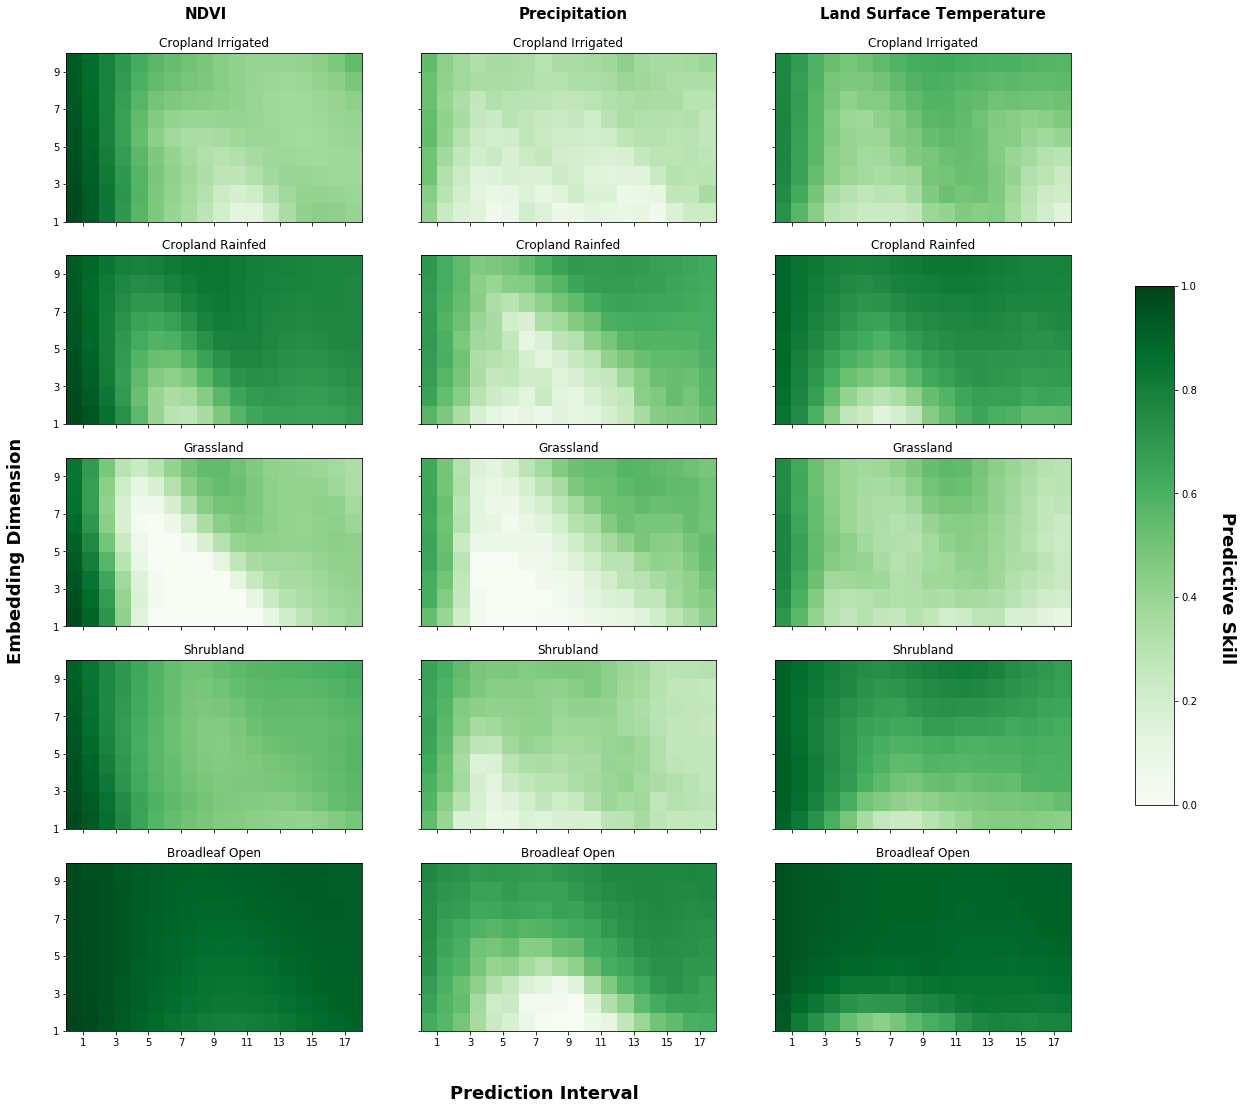

In [192]:
fig, axs = plt.subplots(5, 3, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'LST']
lc_list = ['Rainfed Croplands', 'Irrigated Croplands', 'Grasslands', 'Shrublands', 'Broadleaf Open Tree Cover']


df_list = [spx_ndvi_crop_irr_rho_df, spx_precip_crop_irr_rho_df, spx_lst_crop_irr_rho_df, 
           spx_ndvi_crop_rain_rho_df, spx_precip_crop_rain_rho_df, spx_lst_crop_rain_rho_df,
           spx_ndvi_grassland_rho_df, spx_precip_grassland_rho_df, spx_lst_grassland_rho_df,
           spx_ndvi_shrubland_rho_df, spx_precip_shrubland_rho_df, spx_lst_shrubland_rho_df,
           spx_ndvi_broadleaf_open_rho_df, spx_precip_broadleaf_open_rho_df, spx_lst_broadleaf_open_rho_df]
           

for i, data in enumerate(df_list):
    xlim = [0,18] #change depending on dekad time period into future of interest
    ylim = [1,10]
    xticks = list(range(1,19, 2)) 
    yticks = list(range(1,11, 2))
    
    im = axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)
    
    if i<3:
        axs[i].set_title('Cropland Irrigated')
    if 2<i<6:
        axs[i].set_title('Cropland Rainfed')
    if 5<i<9:
        axs[i].set_title('Grassland')
    if 8<i<12:
        axs[i].set_title('Shrubland')
    if 11<i<15:
        axs[i].set_title('Broadleaf Open')
    
    
#    # axs[0].text(0.35, 1.4, 'Croplands', transform=axs[0].transAxes, size=15, fontweight='bold')
# axs[0] = axs[0].text(5, 11, 'NDVI', transform=axs[0].transAxes, size=15, fontweight='bold')
# axs[0] = axs[0].text(15, 11, 'Precipitation', transform=axs[0].transAxes, size=15, fontweight='bold')
# axs[0] = axs[0].text(25, 11, 'Land Surface Temperature', transform=axs[0].transAxes, size=15, fontweight='bold')

#axs[0] = axs[0].text(12, 11, 'Cropland, Rainfed', size=15, fontweight='bold')
#     if i<4:
#         axs[i].set_title('NDVI')
#     if 3<i<8:
#         axs[i].set_title('Precipitation')
#     if 7<i<12:
#         axs[i].set_title('Land Surface Temperature')
    
axs[0].text(0.4, 1.2, 'NDVI', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.53, 1.2, 'Precipitation', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(2.55, 1.2, 'Land Surface Temperature', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.3, -5.2, 'Prediction Interval', transform=axs[0].transAxes, size=18, fontweight='bold')
axs[0].text(-0.2, -2.6, 'Embedding Dimension', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)
axs[0].text(3.9, -2.6, 'Predictive Skill', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 270)
# axs[9].text(0.9, 2, 'Six-Month Simplex Projection Rho Measure of Error Between Obs vs Pred ', transform=axs[0].transAxes, size=15, fontweight='bold')

cbar_ax = fig.add_axes([0.95, .3, .03, .4])
fig.colorbar(im, cax=cbar_ax)
#plt.savefig('/home/rgreen/simplex_rho_6mo.png', dpi = 500)

# Plot Simplex Error

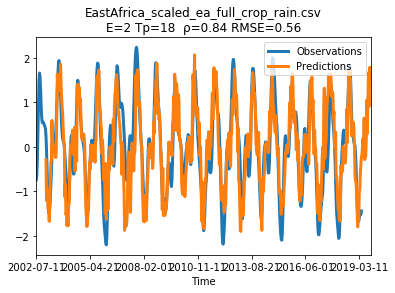

In [7]:
ea_final_simplex_cr = Simplex(pathIn = EASTAFRICA_FINAL, dataFile = 'EastAfrica_scaled_ea_full_crop_rain.csv', lib = '1 605', pred = '1 606', E = 2, Tp = 18, columns = 'P LST NDVI', target = 'NDVI', showPlot = True)

In [8]:
ea_final_simplex_cr = ea_final_simplex_cr.set_index('Time')
ea_final_simplex_cr.index = pd.to_datetime(ea_final_simplex_cr.index)

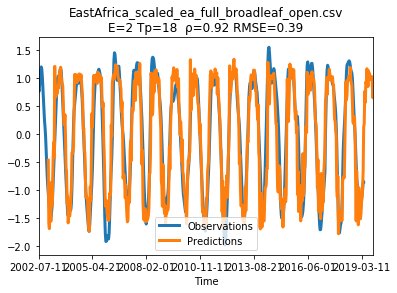

In [9]:
ea_final_simplex_bo = Simplex(pathIn = EASTAFRICA_FINAL, dataFile = 'EastAfrica_scaled_ea_full_broadleaf_open.csv', lib = '1 605', pred = '1 606', E = 2, Tp = 18, columns = 'P LST NDVI', target = 'NDVI', showPlot = True)


In [23]:
ea_final_simplex_bo = ea_final_simplex_bo.set_index('Time')
ea_final_simplex_bo.index = pd.to_datetime(ea_final_simplex_bo.index)

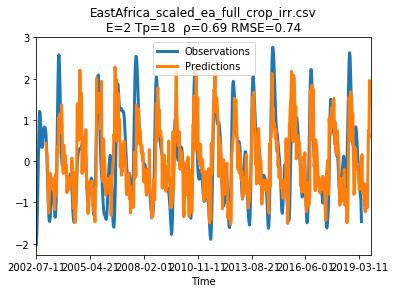

In [10]:
ea_final_simplex_ci = Simplex(pathIn = EASTAFRICA_FINAL, dataFile = 'EastAfrica_scaled_ea_full_crop_irr.csv', lib = '1 605', pred = '1 606', E = 2, Tp = 18, columns = 'P LST NDVI', target = 'NDVI', showPlot = True)
ea_final_simplex_ci = ea_final_simplex_ci.set_index('Time')
ea_final_simplex_ci.index = pd.to_datetime(ea_final_simplex_ci.index)

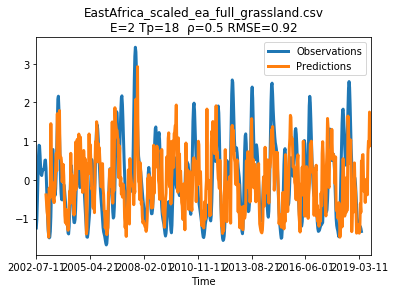

In [11]:
ea_final_simplex_gr = Simplex(pathIn = EASTAFRICA_FINAL, dataFile = 'EastAfrica_scaled_ea_full_grassland.csv', lib = '1 605', pred = '1 606', E = 2, Tp = 18, columns = 'P LST NDVI', target = 'NDVI', showPlot = True)
ea_final_simplex_gr = ea_final_simplex_gr.set_index('Time')
ea_final_simplex_gr.index = pd.to_datetime(ea_final_simplex_gr.index)

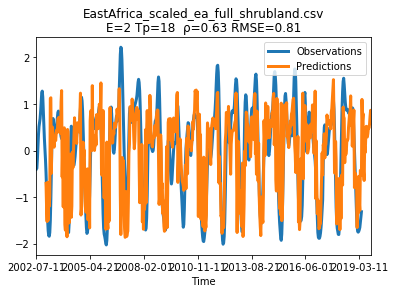

In [12]:
ea_final_simplex_sh = Simplex(pathIn = EASTAFRICA_FINAL, dataFile = 'EastAfrica_scaled_ea_full_shrubland.csv', lib = '1 605', pred = '1 606', E = 2, Tp = 18, columns = 'P LST NDVI', target = 'NDVI', showPlot = True)
ea_final_simplex_sh = ea_final_simplex_sh.set_index('Time')
ea_final_simplex_sh.index = pd.to_datetime(ea_final_simplex_sh.index)

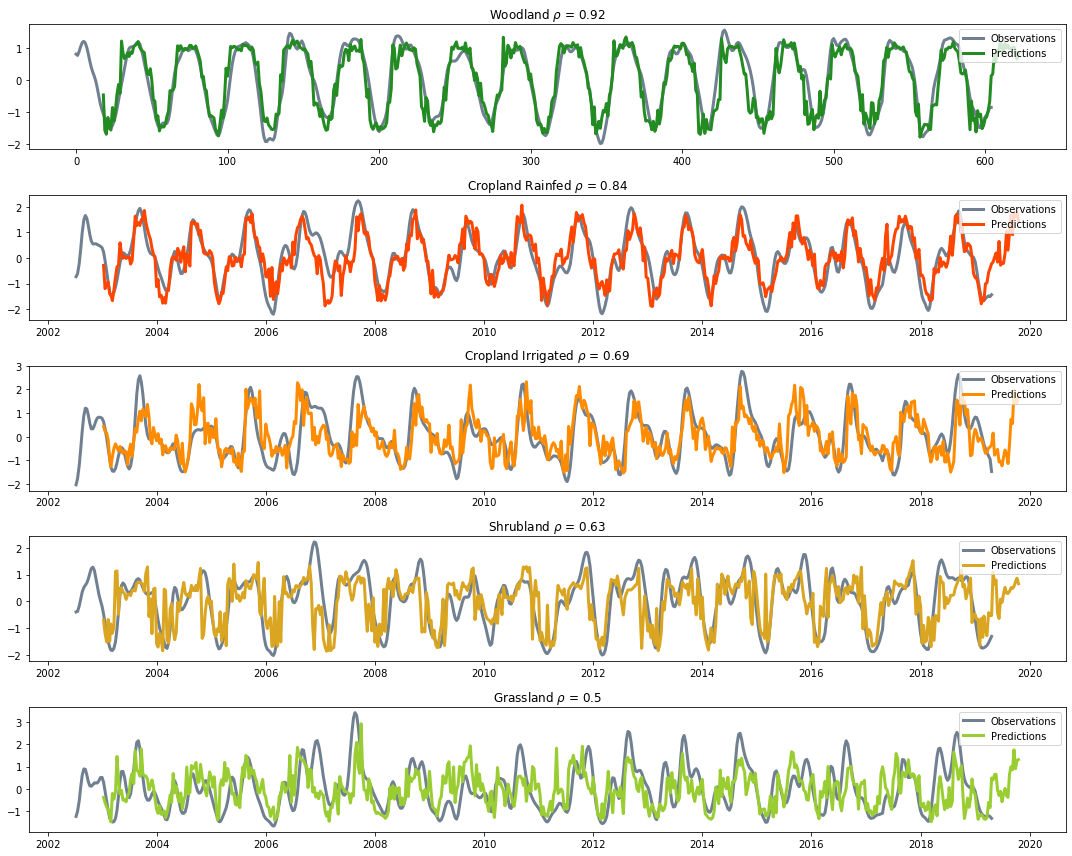

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize = (15, 12))
ax1.plot(ea_final_simplex_bo.Observations,label = 'Observations',  linewidth = 3, c= 'slategrey')
ax1.plot(ea_final_simplex_bo.Predictions, label = 'Predictions', linewidth = 3, c = 'forestgreen')
ax1.legend(loc = 1)
ax1.set_title('Woodland ' r'$\rho$' ' = 0.92')
ax2.plot(ea_final_simplex_cr.Observations, label = 'Observations', linewidth = 3, c= 'slategrey')
ax2.plot(ea_final_simplex_cr.Predictions, label = 'Predictions', linewidth = 3, c = 'orangered')
ax2.legend(loc = 1)
ax2.set_title('Cropland Rainfed ' r'$\rho$' ' = 0.84')
ax3.plot(ea_final_simplex_ci.Observations, label = 'Observations', linewidth = 3, c= 'slategrey')
ax3.plot(ea_final_simplex_ci.Predictions, label = 'Predictions', linewidth = 3, c = 'darkorange')
ax3.legend(loc=1)
ax3.set_title('Cropland Irrigated 'r'$\rho$' ' = 0.69')
ax4.plot(ea_final_simplex_sh.Observations, label = 'Observations', linewidth = 3, c= 'slategrey')
ax4.plot(ea_final_simplex_sh.Predictions, label = 'Predictions', linewidth = 3, c = 'goldenrod')
ax4.legend(loc =1)
ax4.set_title('Shrubland ' r'$\rho$' ' = 0.63')
ax5.plot(ea_final_simplex_gr.Observations, label = 'Observations', linewidth = 3, c= 'slategrey')
ax5.plot(ea_final_simplex_gr.Predictions, label = 'Predictions', linewidth = 3, c = 'yellowgreen')
ax5.legend(loc = 1)
ax5.set_title('Grassland ' r'$\rho$' ' = 0.5')

fig.tight_layout()

plt.savefig('/home/rgreen/DroughtEDM/Figures/prediction_ts_lcs.png', dpi = 300)

Text(0, 0.5, 'NDVI Anomaly')

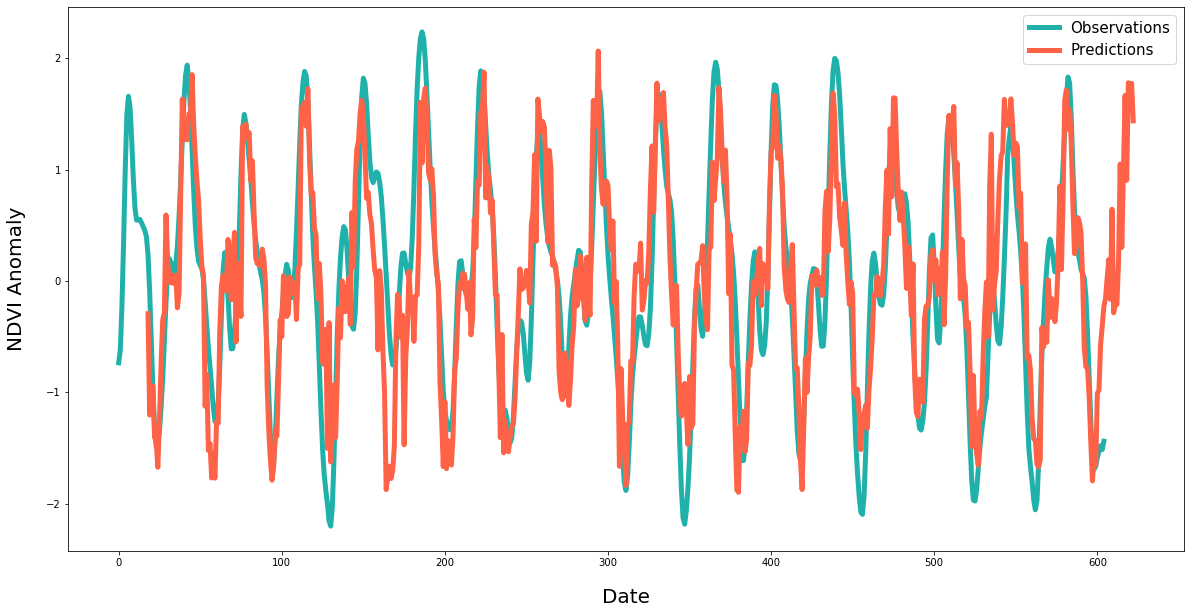

In [167]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes()
ax.plot(ea_final_simplex_cr.Observations, linewidth = 5, label = 'Observations', c = 'lightseagreen')
ax.plot(ea_final_simplex_cr.Predictions, linewidth = 5, label = 'Predictions', c = 'tomato')
ax.legend(loc=1, fontsize=15)
ax.set_xlabel('Date', fontsize = 20, labelpad = 20)
ax.set_ylabel('NDVI Anomaly', fontsize = 20, labelpad = 20)

In [82]:
import matplotlib.dates as mdates

In [84]:
years = mdates.YearLocator()  
years_fmt = mdates.DateFormatter('%Y')

KeyError: -1

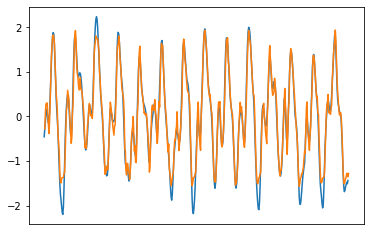

In [86]:
fig, ax = plt.subplots()
ax.plot(ea_final_simplex.Time, ea_final_simplex.Observations)
ax.plot(ea_final_simplex.Time, ea_final_simplex.Predictions)
ax.xaxis.set_major_locator(years)

datemin = np.datetime64(ea_final_simplex['Time'][0], 'Y')
datemax = np.datetime64(ea_final_simplex['Time'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

In [88]:
import datetime as dt

In [89]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in ea_final_simplex['Time']]

In [334]:
test

,Time,Observations,Predictions
0,2005-04-11,-1.233318,NaN
1,2005-04-21,-0.208050,-0.803547
2,2005-05-01,0.684396,-0.188613
3,2005-05-11,0.256602,-0.061069
4,2005-05-21,0.538047,0.239225
...,...,...,...
396,2016-04-11,-0.158415,-0.797413
397,2016-04-21,-0.011371,-0.532825
398,2016-05-01,0.901566,-0.379022
399,2016-05-11,1.106891,0.076776


In [335]:
ComputeError(list(test.Observations), list(test.Predictions))

{'MAE': 0.2614244975440288,
 'RMSE': 0.35493816504457654,
 'rho': 0.9407007557773299}

No handles with labels found to put in legend.


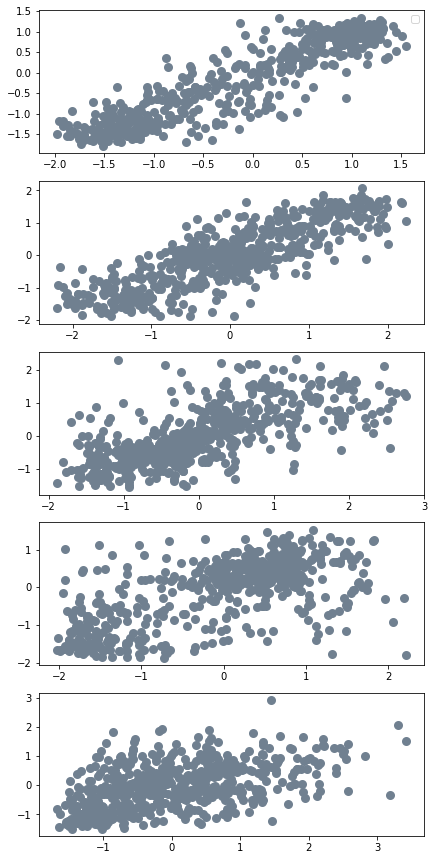

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize = (6, 12))
ax1.scatter(ea_final_simplex_bo.Observations, ea_final_simplex_bo.Predictions, linewidth = 3, c= 'slategrey')
#ax1.plot(ea_final_simplex_bo.Predictions, label = 'Predictions', linewidth = 3, c = 'forestgreen')
ax1.legend(loc = 1)
# ax1.set_title('Woodland ' r'$\rho$' ' = 0.92')
ax2.scatter(ea_final_simplex_cr.Observations, ea_final_simplex_cr.Predictions, linewidth = 3, c= 'slategrey')
# ax2.plot(ea_final_simplex_cr.Predictions, label = 'Predictions', linewidth = 3, c = 'orangered')
# ax2.legend(loc = 1)
# ax2.set_title('Cropland Rainfed ' r'$\rho$' ' = 0.84')
ax3.scatter(ea_final_simplex_ci.Observations, ea_final_simplex_ci.Predictions, linewidth = 3, c= 'slategrey')
# ax3.plot(ea_final_simplex_ci.Predictions, label = 'Predictions', linewidth = 3, c = 'darkorange')
# ax3.legend(loc=1)
# ax3.set_title('Cropland Irrigated 'r'$\rho$' ' = 0.69')
ax4.scatter(ea_final_simplex_sh.Observations, ea_final_simplex_sh.Predictions, linewidth = 3, c= 'slategrey')
# ax4.plot(ea_final_simplex_sh.Predictions, label = 'Predictions', linewidth = 3, c = 'goldenrod')
# ax4.legend(loc =1)
# ax4.set_title('Shrubland ' r'$\rho$' ' = 0.63')
ax5.scatter(ea_final_simplex_gr.Observations, ea_final_simplex_gr.Predictions, linewidth = 3, c= 'slategrey')
# ax5.plot(ea_final_simplex_gr.Predictions, label = 'Predictions', linewidth = 3, c = 'yellowgreen')
# ax5.legend(loc = 1)
# ax5.set_title('Grassland ' r'$\rho$' ' = 0.5')

fig.tight_layout()

plt.savefig('/home/rgreen/DroughtEDM/Figures/prediction_ts_lcs.png', dpi = 300)

In [21]:
ea_final_simplex_bo

,Time,Observations,Predictions
0,2002-07-11,0.801160,NaN
1,2002-07-21,0.759987,NaN
2,2002-08-01,0.881258,NaN
3,2002-08-11,1.029183,NaN
4,2002-08-21,1.153850,NaN
...,...,...,...
618,2019-09-08,NaN,0.980402
619,2019-09-18,NaN,1.023615
620,2019-09-28,NaN,0.888974
621,2019-10-08,NaN,0.646581


In [35]:
simplex_bo_ond = ea_final_simplex_bo[ea_final_simplex_bo.index.month.isin([10,11,12])].dropna()
simplex_bo_mam = ea_final_simplex_bo[ea_final_simplex_bo.index.month.isin([3,4,5])].dropna()
simplex_bo_jja = ea_final_simplex_bo[ea_final_simplex_bo.index.month.isin([6,7,8])].dropna()
simplex_bo_djf = ea_final_simplex_bo[ea_final_simplex_bo.index.month.isin([12,1,2])].dropna()

simplex_gr_ond = ea_final_simplex_gr[ea_final_simplex_gr.index.month.isin([10,11,12])].dropna()
simplex_gr_mam = ea_final_simplex_gr[ea_final_simplex_gr.index.month.isin([3,4,5])].dropna()
simplex_gr_jja = ea_final_simplex_gr[ea_final_simplex_gr.index.month.isin([6,7,8])].dropna()
simplex_gr_djf = ea_final_simplex_gr[ea_final_simplex_gr.index.month.isin([12,1,2])].dropna()

simplex_ci_ond = ea_final_simplex_ci[ea_final_simplex_ci.index.month.isin([10,11,12])].dropna()
simplex_ci_mam = ea_final_simplex_ci[ea_final_simplex_ci.index.month.isin([3,4,5])].dropna()
simplex_ci_jja = ea_final_simplex_ci[ea_final_simplex_ci.index.month.isin([6,7,8])].dropna()
simplex_ci_djf = ea_final_simplex_ci[ea_final_simplex_ci.index.month.isin([12,1,2])].dropna()

simplex_cr_ond = ea_final_simplex_cr[ea_final_simplex_cr.index.month.isin([10,11,12])].dropna()
simplex_cr_mam = ea_final_simplex_cr[ea_final_simplex_cr.index.month.isin([3,4,5])].dropna()
simplex_cr_jja = ea_final_simplex_cr[ea_final_simplex_cr.index.month.isin([6,7,8])].dropna()
simplex_cr_djf = ea_final_simplex_cr[ea_final_simplex_cr.index.month.isin([12,1,2])].dropna()

simplex_sh_ond = ea_final_simplex_sh[ea_final_simplex_sh.index.month.isin([10,11,12])].dropna()
simplex_sh_mam = ea_final_simplex_sh[ea_final_simplex_sh.index.month.isin([3,4,5])].dropna()
simplex_sh_jja = ea_final_simplex_sh[ea_final_simplex_sh.index.month.isin([6,7,8])].dropna()
simplex_sh_djf = ea_final_simplex_sh[ea_final_simplex_sh.index.month.isin([12,1,2])].dropna()

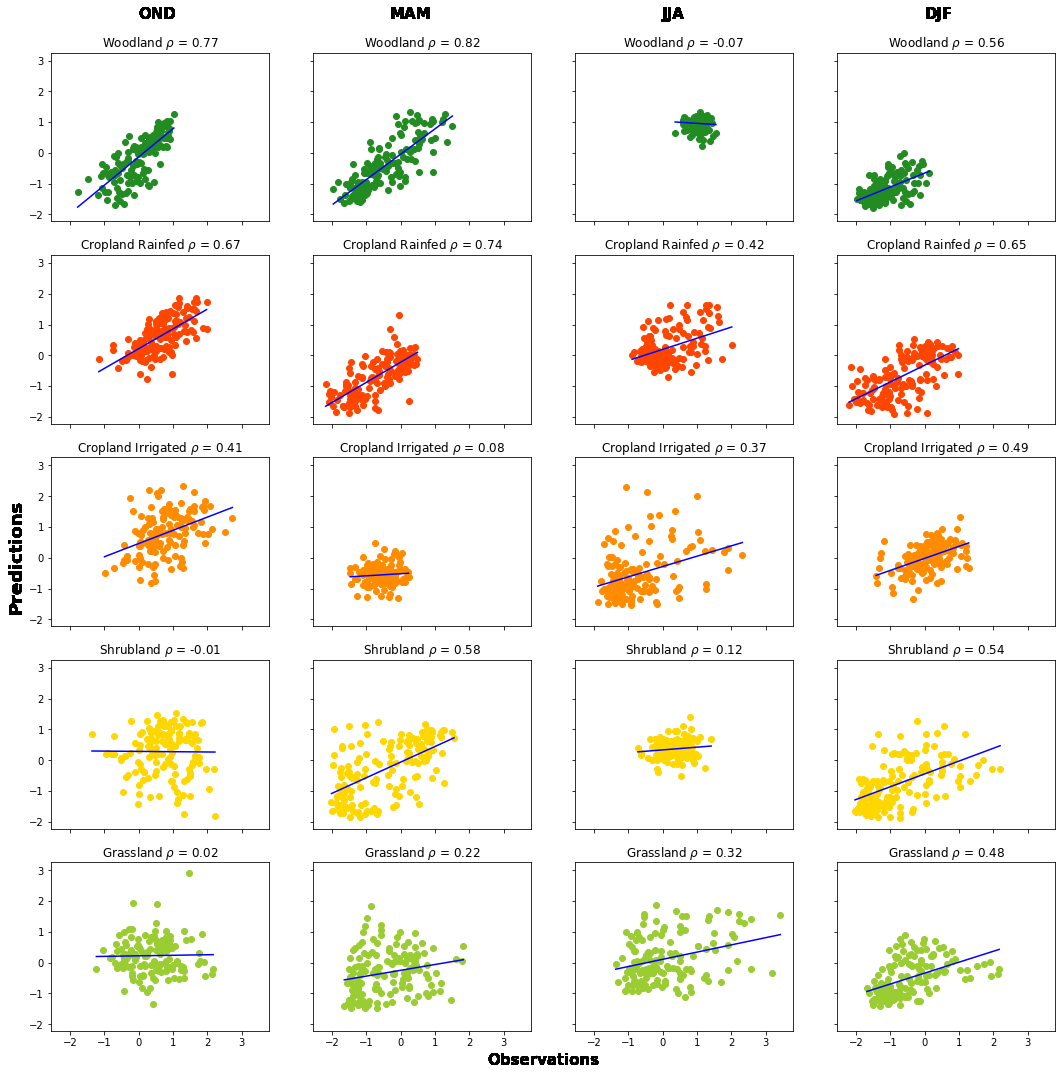

In [78]:
fig, axs = plt.subplots(5, 4, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'LST']
lc_list = ['Rainfed Croplands', 'Irrigated Croplands', 'Grasslands', 'Shrublands', 'Broadleaf Open Tree Cover']


df_list = [simplex_bo_ond, simplex_bo_mam, simplex_bo_jja, simplex_bo_djf, 
          simplex_cr_ond, simplex_cr_mam, simplex_cr_jja, simplex_cr_djf,
          simplex_ci_ond, simplex_ci_mam, simplex_ci_jja, simplex_ci_djf, 
          simplex_sh_ond, simplex_sh_mam, simplex_sh_jja, simplex_sh_djf,
          simplex_gr_ond, simplex_gr_mam, simplex_gr_jja, simplex_gr_djf]
           

for i, data in enumerate(df_list):
    
    #im = axs[i].scatter(data.Observations, data.Predictions)
    axs[i].plot(np.unique(data.Observations), np.poly1d(np.polyfit(data.Observations, data.Predictions, 1))(np.unique(data.Observations)), c = 'blue')
    axs[i].set_title(r'$\rho$ = ' + str(round(scipy.stats.pearsonr(data.Observations, data.Predictions)[0],2 )))
    
    
    if i<4:
        im = axs[i].scatter(data.Observations, data.Predictions, c = 'forestgreen')
        axs[i].set_title('Woodland ' r'$\rho$ = ' + str(round(scipy.stats.pearsonr(data.Observations, data.Predictions)[0],2 )))
    if 3<i<8:
        im = axs[i].scatter(data.Observations, data.Predictions, c = 'orangered')
        axs[i].set_title('Cropland Rainfed ' r'$\rho$ = ' + str(round(scipy.stats.pearsonr(data.Observations, data.Predictions)[0],2 )))
    if 7<i<12:
        im = axs[i].scatter(data.Observations, data.Predictions, c = 'darkorange')
        axs[i].set_title('Cropland Irrigated ' r'$\rho$ = ' + str(round(scipy.stats.pearsonr(data.Observations, data.Predictions)[0],2 )))
    if 11<i<16:
        im = axs[i].scatter(data.Observations, data.Predictions, c = 'gold')
        axs[i].set_title('Shrubland ' r'$\rho$ = ' + str(round(scipy.stats.pearsonr(data.Observations, data.Predictions)[0],2 )))
    if 15<i<20:
        im = axs[i].scatter(data.Observations, data.Predictions, c = 'yellowgreen')
        axs[i].set_title('Grassland ' r'$\rho$ = ' + str(round(scipy.stats.pearsonr(data.Observations, data.Predictions)[0],2 )))
        
    axs[0].text(0.4, 1.2, 'OND', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(1.55, 1.2, 'MAM', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(2.8, 1.2, 'JJA', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(4, 1.2, 'DJF', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(-0.2, -2.3, 'Predictions', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)
    axs[0].text(2, -5, 'Observations', transform=axs[0].transAxes, size=15, fontweight='bold')
    
    
plt.savefig('/home/rgreen/DroughtEDM/Figures/seasonal_landcovers_correlations.png', dpi = 400)